<a href="https://colab.research.google.com/github/Not-Pace/Genre-Classifier/blob/main/TransferLearning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Genre Classifier using Images (Transfer Learning with VGG16)**

Our first attempt was based around using images from the dataset in conjunction with the VGG16 dataset for feature extraction. We used transfer learning to create a simple CNN that could extract features from the mel-spectrograms of the songs and try predicting its genre.




In [ ]:
import librosa
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
import pathlib
import csv

from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
train_path = '/content/gdrive/My Drive/Genre-Classifier/Data/train'
test_path = '/content/gdrive/My Drive/Genre-Classifier/Data/test'

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.)

In [ ]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [ ]:
datatrain_generator = train_gen.flow_from_directory(train_path, target_size=(300,300), batch_size=42, class_mode = 'categorical')
datatest_generator = test_gen.flow_from_directory(test_path, target_size=(300,300), batch_size=42, class_mode = 'categorical')

Found 818 images belonging to 10 classes.
Found 190 images belonging to 10 classes.


In [ ]:
model = VGG16(include_top = False, input_shape = (300,300,3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
output = model.layers[-1].output
model_final = tf.keras.layers.Flatten()(output)
model_final = tf.keras.layers.Dense(512, kernel_regularizer='l2', activation='relu')(model_final)
model_final = tf.keras.layers.Dense(64, kernel_regularizer='l2', activation='relu')(model_final)
model_final = tf.keras.layers.Dense(10, activation='softmax')(model_final)

In [ ]:
model = tf.keras.models.Model(model.input,model_final)

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

Epoch 1/10
20/20 [==============================] - 580s 29s/step - loss: 10.6390 - acc: 0.2372 - val_loss: 8.5892 - val_acc: 0.2895
Epoch 2/10
20/20 [==============================] - 9s 473ms/step - loss: 7.3008 - acc: 0.3826 - val_loss: 6.3267 - val_acc: 0.3211
Epoch 3/10
20/20 [==============================] - 10s 478ms/step - loss: 5.2757 - acc: 0.4829 - val_loss: 4.7561 - val_acc: 0.4368
Epoch 4/10
20/20 [==============================] - 10s 477ms/step - loss: 4.0369 - acc: 0.5269 - val_loss: 3.8295 - val_acc: 0.4263
Epoch 5/10
20/20 [==============================] - 10s 486ms/step - loss: 3.2486 - acc: 0.5941 - val_loss: 3.3794 - val_acc: 0.4579
Epoch 6/10
20/20 [==============================] - 10s 482ms/step - loss: 2.8482 - acc: 0.6247 - val_loss: 3.1264 - val_acc: 0.4474
Epoch 7/10
20/20 [==============================] - 10s 484ms/step - loss: 2.6346 - acc: 0.6601 - val_loss: 3.0875 - val_acc: 0.4474
Epoch 8/10
20/20 [==============================] - 10s 484ms/step - l

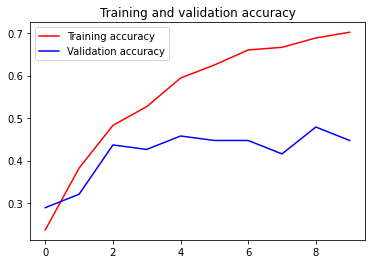

<Figure size 432x288 with 0 Axes>

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['acc'])
history = model.fit(datatrain_generator, epochs=10, validation_data = datatest_generator, verbose = 1)

# model.save('/content/gdrive/My Drive/Genre-Classifier/bruh_willthiswork.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

What we found here was rather odd, in that the validation accuracy was erratic and all over the charts even though the training accuracy was on track. We believe that one of the obvious problems here was overfitting, but a change in the base model (from VGG16) to something else could also make this approach better. Regardless, we decided to make a model from scratch after this instead of exploring transfer learning approaches further.